<a href="https://colab.research.google.com/github/sarayaghoubi/sarayaghoubi/blob/main/tabular_data_Bally.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Exploring our the data :

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')
label_name = 'target'
features = data.columns
data.describe()

,userid,X1,X2,X5,X6,X7,X8,X9,X10,X11,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
count,107782.000000,107782.000000,107782.000000,107782.000000,107782.000000,1.077820e+05,107782.000000,107782.000000,107782.000000,107782.000000,...,1.077820e+05,107782.000000,107782.000000,107719.000000,107719.000000,67263.000000,106503.000000,106503.000000,107756.000000,9.884900e+04
mean,146109.500000,9.009677,4.087445,35.368652,23.186868,1.143330e+03,1.846975,99.069705,1.698472,77.465884,...,1.089219e+03,255.442272,713.083400,920.793221,10277.330991,5.395626,31.508584,1.024704,3.618926,4.712170e+03
std,31114.127694,6.589447,2.753266,12.101350,148.393365,1.003472e+04,1.216565,633.081473,1.234041,907.108504,...,9.979195e+03,533.421797,1708.865604,1086.434760,15009.334645,37.663611,172.417998,0.158986,1.102686,6.625051e+04
min,92219.000000,1.000000,0.000000,17.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000e+00
25%,119164.250000,3.000000,2.000000,26.000000,0.000000,4.010000e+01,0.999907,10.000000,0.999001,0.000000,...,3.148000e+01,25.000000,42.000000,332.000000,2433.000000,1.000000,10.000000,1.000000,3.000000,0.000000e+00
50%,146109.500000,5.000000,3.000000,32.000000,0.000000,1.255750e+02,1.228821,20.000000,0.999500,0.000000,...,1.021050e+02,78.000000,149.000000,599.000000,5158.000000,2.000000,10.000000,1.000000,3.000000,4.700000e+01
75%,173054.750000,14.000000,4.000000,43.000000,0.000000,4.871500e+02,2.270701,50.000000,1.999334,18.070000,...,4.305450e+02,242.000000,584.000000,1110.000000,11769.000000,4.000000,20.000000,1.000000,4.000000,8.854200e+02
max,200000.000000,21.000000,12.000000,98.000000,4375.000000,1.074833e+06,7.996935,79200.000000,7.997334,111220.000000,...,1.074833e+06,15920.000000,42836.000000,34277.000000,256227.000000,1885.000000,15000.000000,4.000000,6.000000,1.354362e+07


In [ ]:
data.head(5)

,userid,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
0,92219,14,10,SMARTPHONE,M,27,0,173.500000,3.416172,25.0,...,173.500000,284,836,278.0,16426.0,0.0,15.0,1.0,4.0,593.46
1,92220,1,3,SMARTPHONE,M,35,0,6804.800018,3.596390,590.0,...,5806.750000,920,5495,948.0,46459.0,0.0,30.0,1.0,3.0,6277.15
2,92221,3,4,SMARTPHONE,M,38,41,453.899998,1.788130,60.5,...,174.849998,237,215,1250.0,3752.0,NaN,60.5,1.0,3.0,NaN
3,92222,21,3,DESKTOP,F,21,0,32.310000,1.239480,10.0,...,32.310000,32,76,78.0,1016.0,NaN,10.0,1.0,3.0,0.00
4,92223,1,10,SMARTPHONE,F,20,0,137.760003,1.876025,45.0,...,137.760003,55,157,888.0,12441.0,NaN,15.0,1.0,3.0,64.30


devide columns having categorical, continues or discrete values

In [ ]:
#  to identify columns have categorical charectristic
unique = data.nunique()
print(f'number of unique values in each column:{unique}')

categorical_f = ['X3','X4']
continues_f = ['X7','X8','X10','X9','X12','X13','X14','X16','X17','X19','X20','X21','X22','X23','X25']
sparse = ['X6','X11','X18','X24']
discrete_f = ['X1','X2','X5','X15','X26','X27']

number of unique values in each column:userid    107782
X1             8
X2            11
X3             5
X4             2
X5            79
X6          1312
X7         79606
X8         78786
X9          2362
X10        10674
X11         7341
X12        99863
X13        95585
X14        89015
X15            9
X16       101979
X17       106575
X18         5370
X19        78385
X20         3316
X21         6970
X22         5511
X23        29611
X24          319
X25          630
X26            4
X27            6
target     57225
dtype: int64


we also need fill the nan values to properly choosing the method that best address this issue we may require to dplot the distributuin of each fearure

plot the data distribution:

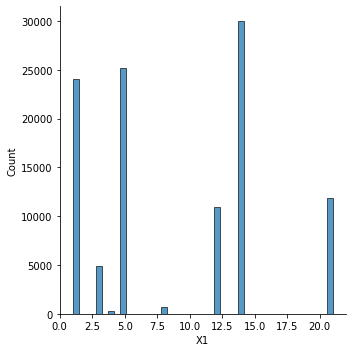

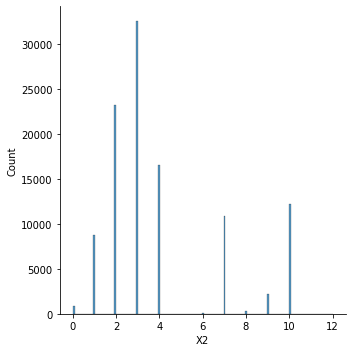

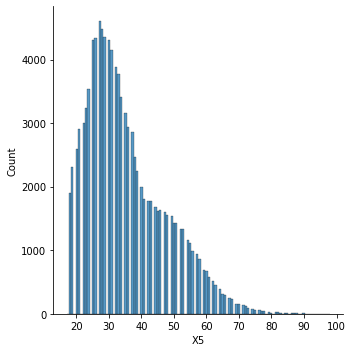

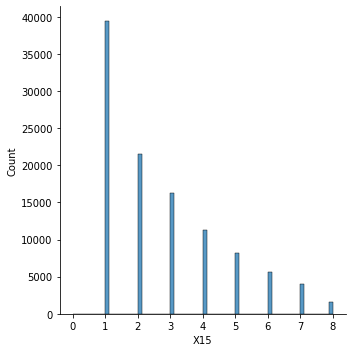

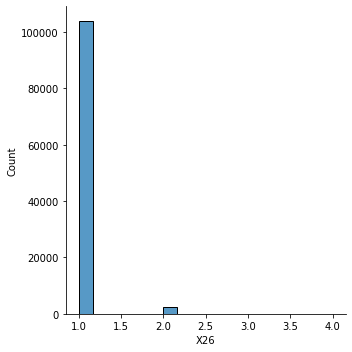

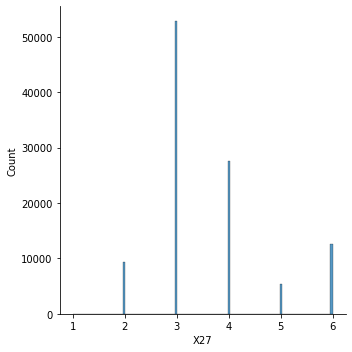

In [ ]:
import math
def plot_features(df, method, col, cont = False):
  n = len(col)
  for f in col:
      method(df[f])
      plt.show()

plot_features(data,sns.displot, discrete_f)

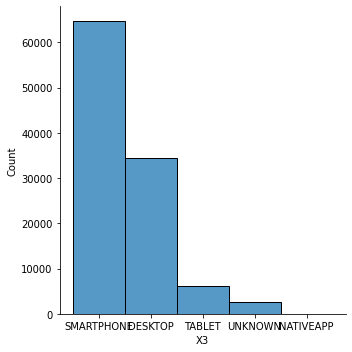

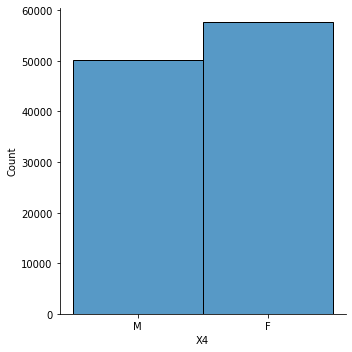

In [ ]:
plot_features(data,sns.displot, categorical_f)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


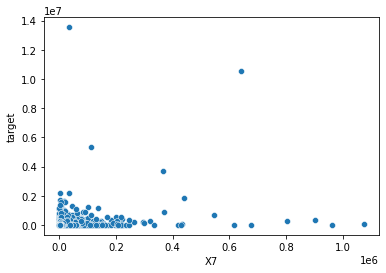

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


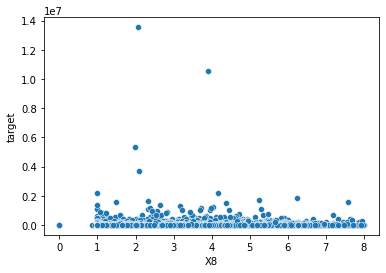

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


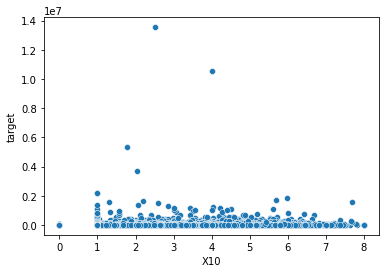

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


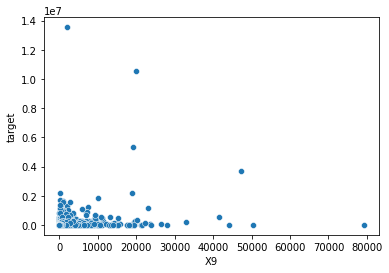

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


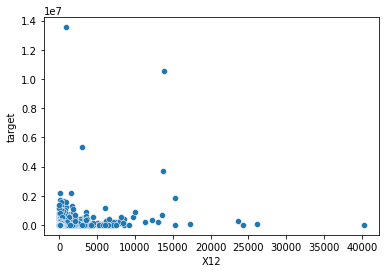

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


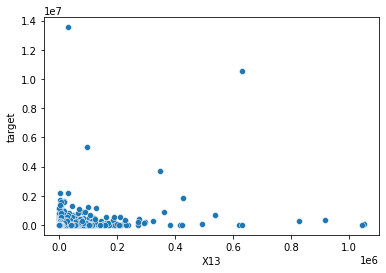

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


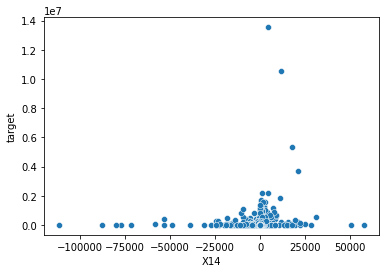

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


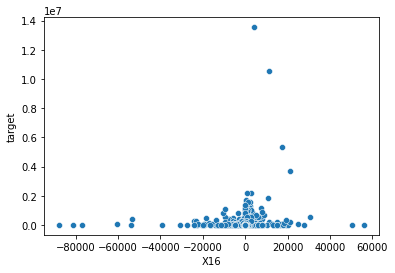

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


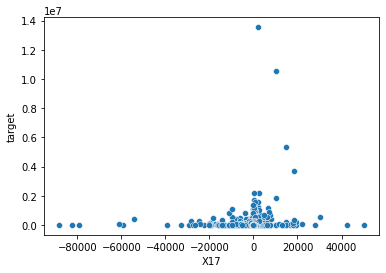

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


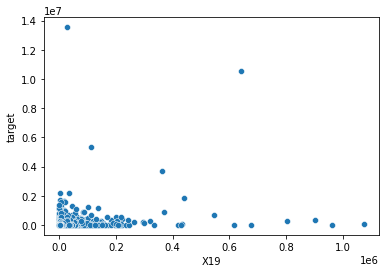

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


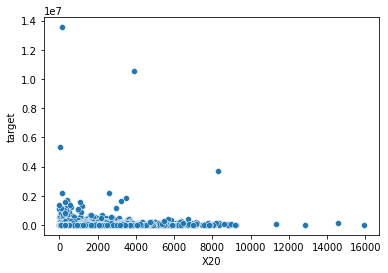

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


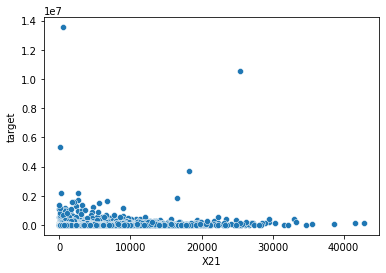

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


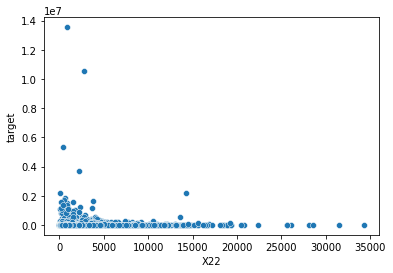

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


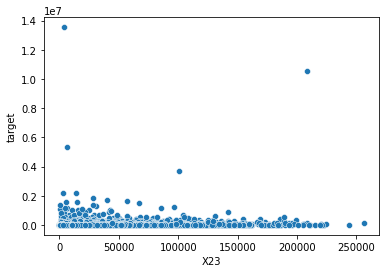

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


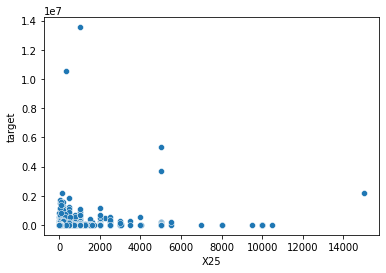

In [ ]:
for f in continues_f:
  sns.scatterplot(data[f], data['target'])
  plt.show()

In [ ]:
data.isna().sum()

userid        0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22          63
X23          63
X24       40519
X25        1279
X26        1279
X27          26
target     8933
dtype: int64

**Based on the correlation map any feature having correlation more than 90 percent will be droped**

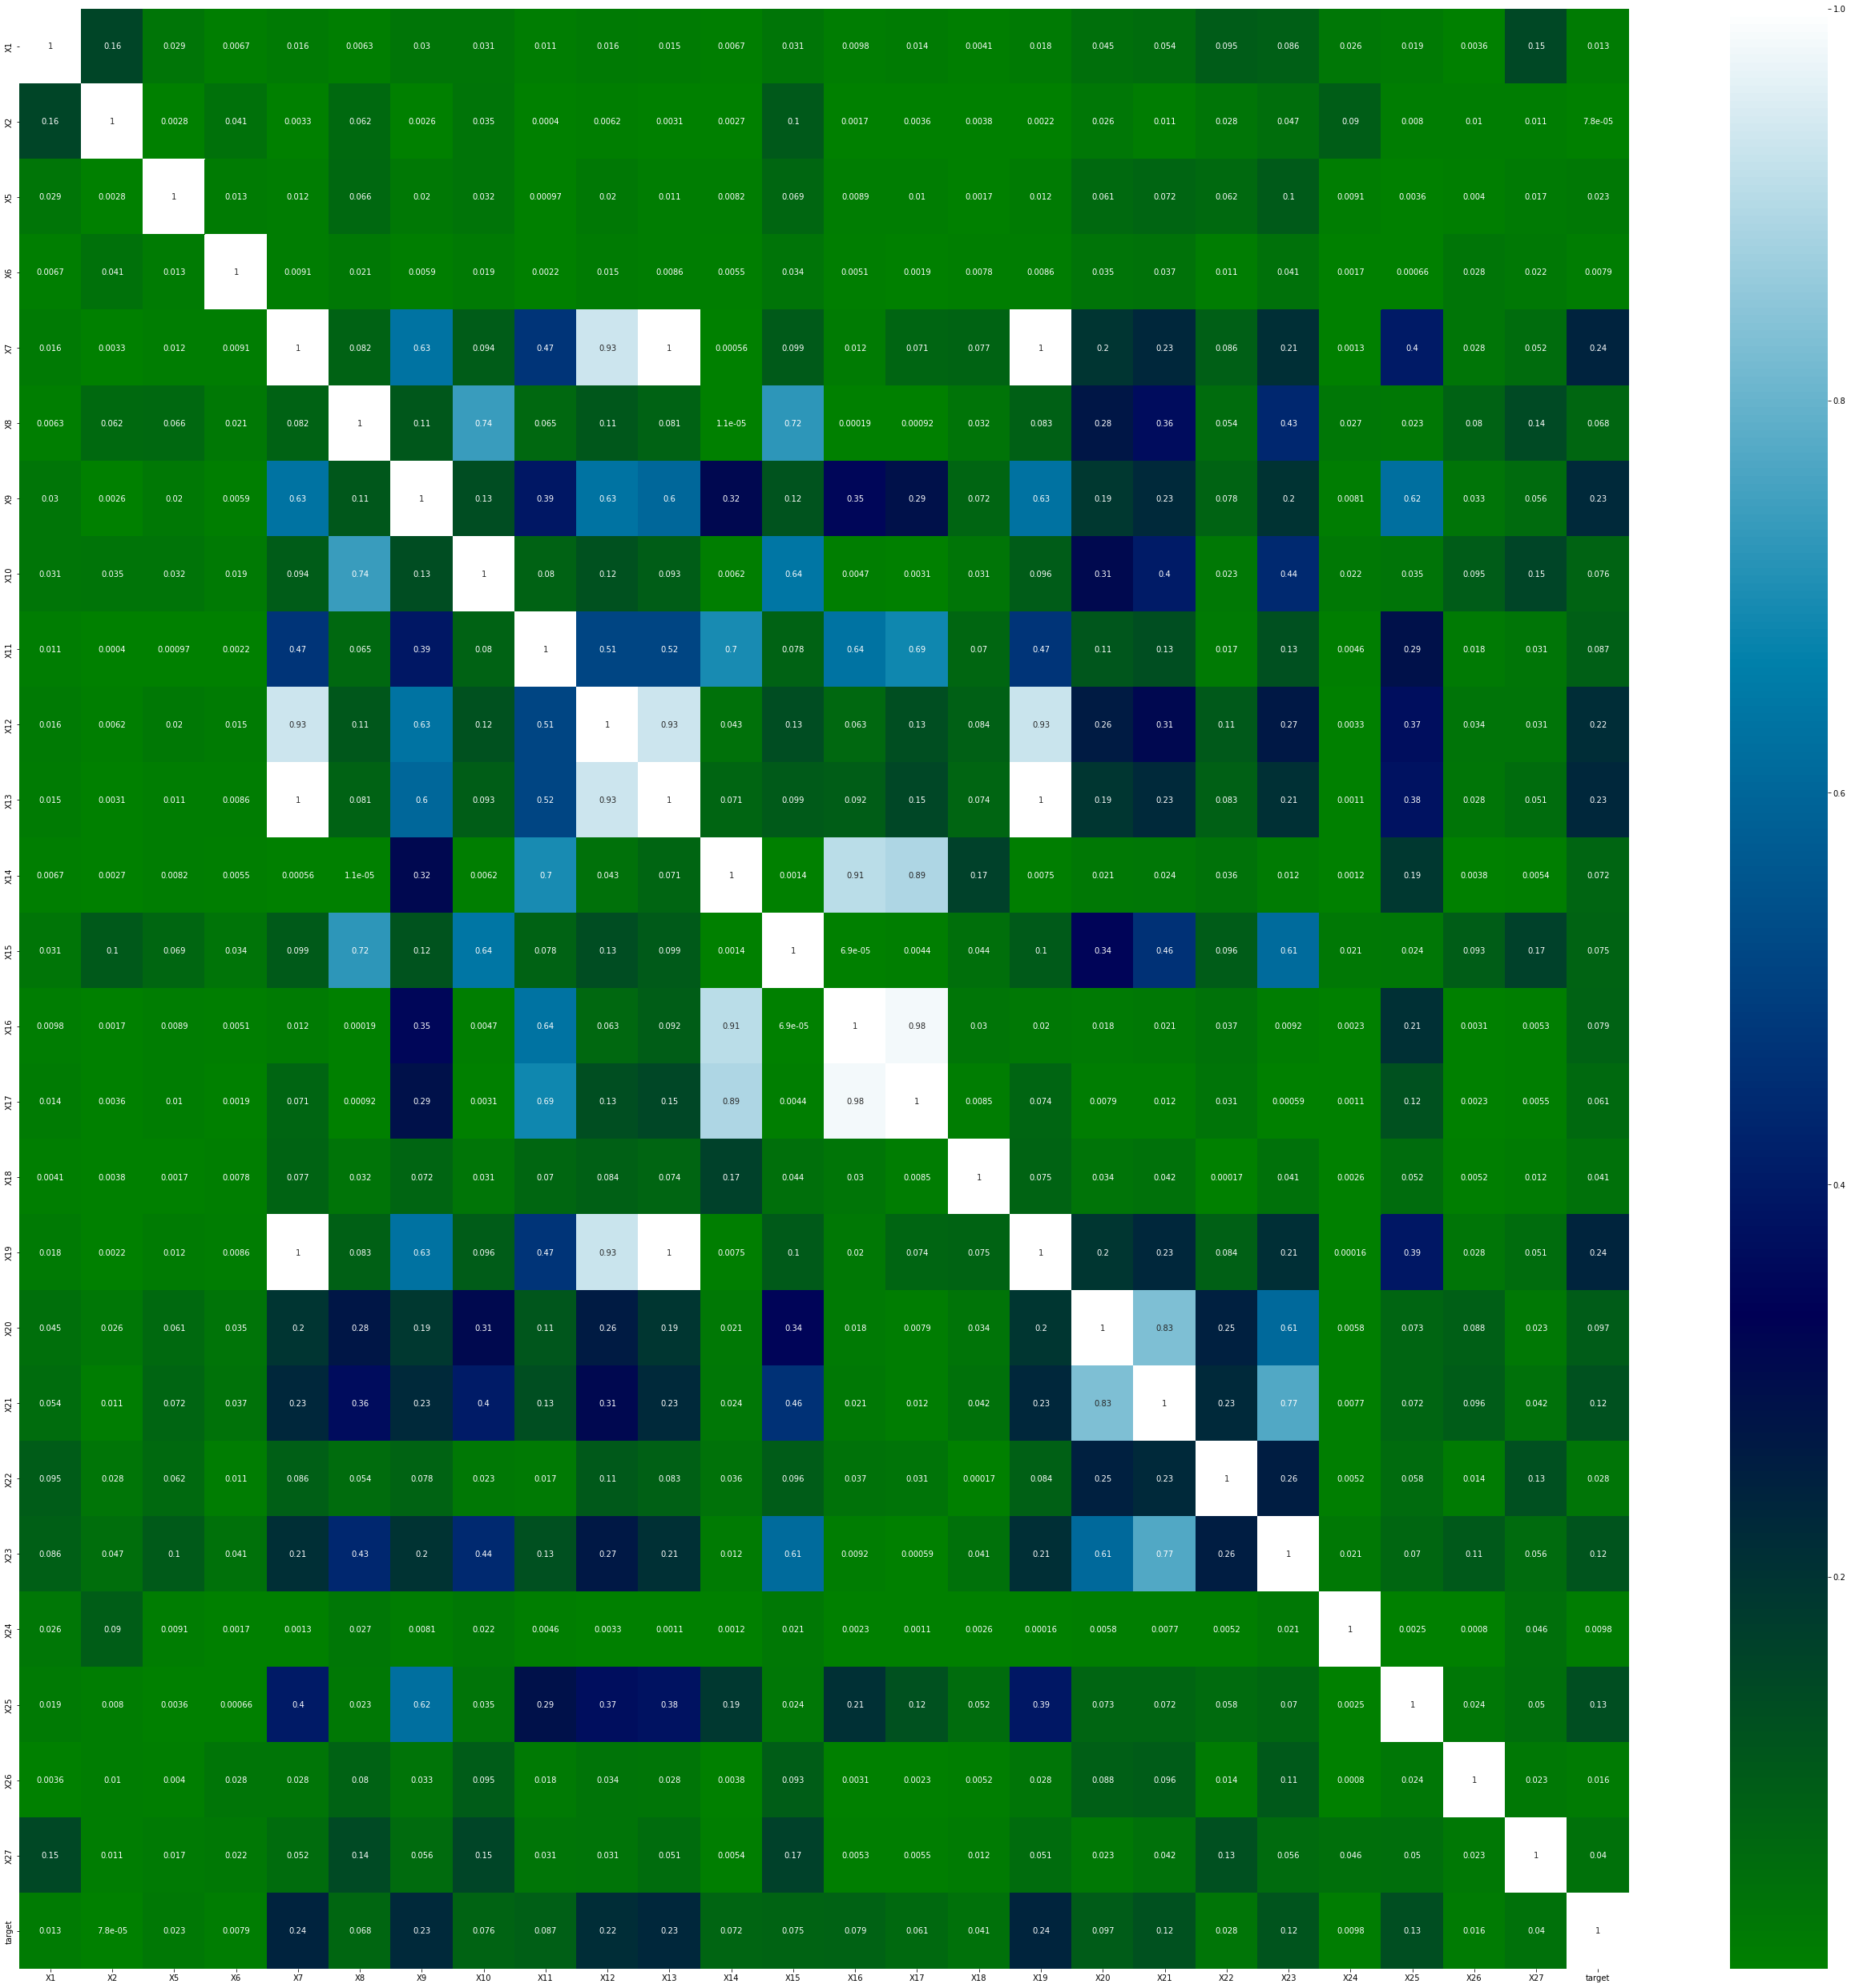

In [ ]:
correlation_map = data.drop('userid', axis = 1).corr()
plt.figure(figsize = (45,45))
sns.heatmap(correlation_map.abs(),annot = True, cmap = 'ocean')
##

In [ ]:
# t see the correlation between ariables :
correlation_map

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
X1,1.000000,-0.155975,-0.028802,-0.006705,0.016383,-0.006291,0.030273,0.030694,0.010767,0.016082,...,0.017769,0.044895,0.053796,-0.094881,-0.086419,-0.025606,0.018772,0.003647,0.147267,0.013010
X2,-0.155975,1.000000,-0.002837,-0.040979,0.003253,0.062330,-0.002567,0.035126,-0.000400,0.006154,...,0.002247,0.026015,0.010853,-0.028426,0.047398,0.090372,0.008039,0.010402,-0.010645,-0.000078
X5,-0.028802,-0.002837,1.000000,0.012947,0.011664,0.065712,0.019686,0.031678,0.000973,0.020452,...,0.012211,0.061458,0.071833,0.061792,0.101503,0.009134,0.003599,-0.004039,-0.017122,0.023010
X6,-0.006705,-0.040979,0.012947,1.000000,0.009101,0.021060,0.005938,0.019270,0.002172,0.014605,...,0.008617,0.035114,0.037182,0.011081,0.040815,-0.001708,0.000655,0.028144,0.022387,0.007885
X7,0.016383,0.003253,0.011664,0.009101,1.000000,0.081620,0.633867,0.094458,0.468895,0.931175,...,0.999138,0.195375,0.232139,0.086209,0.211497,0.001335,0.401429,0.028368,0.051546,0.242393
X8,-0.006291,0.062330,0.065712,0.021060,0.081620,1.000000,0.107361,0.741051,0.064761,0.106175,...,0.082998,0.275618,0.364237,-0.053947,0.434825,-0.027353,0.022595,0.080163,0.141496,0.068232
X9,0.030273,-0.002567,0.019686,0.005938,0.633867,0.107361,1.000000,0.132991,0.392259,0.632988,...,0.632031,0.189033,0.227618,0.078111,0.202808,-0.008146,0.624274,0.032870,0.055560,0.228750
X10,0.030694,0.035126,0.031678,0.019270,0.094458,0.741051,0.132991,1.000000,0.080319,0.121167,...,0.095670,0.310084,0.402553,-0.023379,0.437571,-0.021797,0.034761,0.095180,0.154264,0.076389
X11,0.010767,-0.000400,0.000973,0.002172,0.468895,0.064761,0.392259,0.080319,1.000000,0.512287,...,0.469522,0.110446,0.129528,0.017100,0.125034,-0.004562,0.290057,0.018161,0.031102,0.086533
X12,0.016082,0.006154,0.020452,0.014605,0.931175,0.106175,0.632988,0.121167,0.512287,1.000000,...,0.929476,0.262794,0.313733,0.105299,0.270076,0.003312,0.369768,0.034353,0.031345,0.218280


# 2. Cleaning the data
* 2.1. fill or drop columns having None value : 

---
    2.1.1.  first droping the labels having Nan values**
---
    2.1.2. then removing the column X24, as impute it based on the current information would create bias, also it takes up to half of our dataset
---
    2.1.3. impute columns having less than 100 missing values with median( as the distribution is skewed I did not use mean)
---
    2.1.4. finally fill the nan values from columns X25,X26 with KNN method:
* 2.2 removing outliers:
--- 
    remove 0.5 percentile(of each feature) from the dataset




In [ ]:
#2.1
data.drop(['userid'],axis = 1, inplace=True)
# drop rows having missing values in the 'targer' :
data.drop(data[data.target.isnull()].index, inplace=True)
#  to check which column s have Nan values and need to be dealt with :
print(f'number of missing values in each column: {data.isna().sum()}')
# since the number of missing values in column X24 is about 40 thousands(half of our dataset) we require to drop this column since predicting it based on other features may result in bias:
data.drop(['X24'],axis = 1, inplace=True)


number of missing values in each column: X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22          52
X23          52
X24       37482
X25        1055
X26        1055
X27          23
target        0
dtype: int64


impute missing values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# for columns : [X22,x23, x27]
def fill_missing_values(data, imputer=None):
  data['X22'].fillna(data['X22'].median(),inplace = True)
  data['X23'].fillna(data['X23'].median(),inplace = True)
  data['X27'].fillna(data['X27'].median(),inplace = True)
  # using one-hot-encoder to convert the categorical data into numberical
  ord_enc = OrdinalEncoder()
  data[categorical_f] = ord_enc.fit_transform(data[categorical_f])
  X = data.drop(['target'],axis = 1)
  if imputer is None:
    imputer = KNNImputer(n_neighbors= 12)
    imputer.fit(X)
    X[:] = imputer.transform(X)
  else:
    X[:] = imputer.transform(X)
  return X.join(data['target']),imputer
X,imputer = fill_missing_values(data)
X.isna().sum().sum()

0

Looking for potential outlier to remove, but I moved on as my feature scale algorithm detects outliers and will be droped in the next stage

In [ ]:
# # d2
def remove_outliers(data, p):
  Q1 = data.quantile(p)
  Q3 = data.quantile(1-p)
  return data.drop(data.loc[(data<Q1) | (data>Q3)].index)
# columns having outliers in their 

for o in continues_f:
  X[o] = remove_outliers(X[o],0.005)
X.dropna(inplace = True)

In [ ]:
X.isna().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
X16       0
X17       0
X18       0
X19       0
X20       0
X21       0
X22       0
X23       0
X25       0
X26       0
X27       0
target    0
dtype: int64

# 3. Normalizing the data and scaling them
> choosing algorithms that are more robust to outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer, StandardScaler
def P_transform(X, method = StandardScaler, transformer=None ):
  if transformer is None:
    transformer = method().fit(X)
  X = transformer.transform(X)
#   X.loc[:, X.columns != 'target'] = scaled_x 
  if isinstance(X,pd.DataFrame):
    X.dropna(inplace = True)
  return X, transformer

## 3. Selecting and removing some of the features:
We will have different 5 data and 5 models
to construct our model 
>    * first find the importance of each feature
>    * then select features with lowest importance score to drop
>    * Also, drop features having high correlation


Feature: 0, Score: 0.01139
Feature: 1, Score: 0.01243
Feature: 2, Score: 0.00395
Feature: 3, Score: 0.00075
Feature: 4, Score: 0.02756
Feature: 5, Score: 0.01838
Feature: 6, Score: 0.03272
Feature: 7, Score: 0.04444
Feature: 8, Score: 0.12906
Feature: 9, Score: 0.07448
Feature: 10, Score: 0.04985
Feature: 11, Score: 0.07363
Feature: 12, Score: 0.03338
Feature: 13, Score: 0.09554
Feature: 14, Score: 0.00735
Feature: 15, Score: 0.03024
Feature: 16, Score: 0.02609
Feature: 17, Score: 0.02658
Feature: 18, Score: 0.01056
Feature: 19, Score: 0.03999
Feature: 20, Score: 0.03427
Feature: 21, Score: 0.10873
Feature: 22, Score: 0.06535
Feature: 23, Score: 0.00959
Feature: 24, Score: 0.00434
Feature: 25, Score: 0.02935


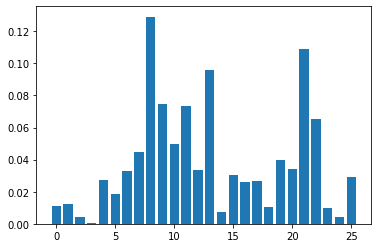

droped columns :['X4', 'X3', 'X26', 'X15']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from collections import Counter

model = DecisionTreeRegressor()
# fit the model
model.fit(X.loc[:, X.columns != 'target'], X['target'])
# get importance
importance = model.feature_importances_
# summarize feature importance
importance__dict = {}
for i,v in enumerate(importance):
    importance__dict[f'{i}'] = v
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
k = 4
least_important = [y[0] for y in sorted(importance__dict.items(), key = lambda x: x[1])[:k]]
least_important = [X.columns.tolist()[int(i)] for i in least_important]
print(f'droped columns :{least_important}')

upper_tri = correlation_map.where(np.triu(np.ones(correlation_map.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
# print(to_drop)
to_drop = Counter(to_drop.extend(least_important))

In [ ]:
X.isna().sum()

X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
X16       0
X17       0
X18       0
X19       0
X20       0
X21       0
X22       0
X23       0
X25       0
X26       0
X27       0
target    0
dtype: int64

4. Defininf a functuin that reproduce the X_train and test:

  

In [ ]:
# define a function for the data pre-processing to make sure the data is being processed corrdclty:

def data_preperation(data, potential_outlier_containers, to_drop, to_scale=False):
  continues_f = ['X7','X8','X10','X9','X12','X13','X14','X16','X17','X19','X20','X21','X22','X23','X25']

  data.drop(to_drop, axis = 1, inplace = True)
  #### split the data into train, test, validation
  train, test = train_test_split(data, random_state=42)
  num_col_names = train.columns.tolist()

  train, imputer = fill_missing_values(train)
  test, _ = fill_missing_values(test, imputer)
  # remove outliers
  for o in potential_outlier_containers:
    train[o] = remove_outliers(train[o], 0.005)
  train.dropna(inplace = True)
  continues_f = [k for k in continues_f if k in data.columns.tolist()]
  # scale continues columns :
  if to_scale is True:
    train[:], transformer = P_transform(train, PowerTransformer)
    # train[sparse_f],transformer2 = P_transformer(train[sparse_f], RobustScaler)
    # train['target'],Y_transformer = P_transform(np.array(train['target']).reshape(-1,1), RobustScaler)
    #
    test[:], _ = P_transform(test, PowerTransformer, transformer)
    # test['target'],_ = P_transform(np.array(test['target']).reshape(-1,1), RobustScaler, Y_transformer)
    # test[sparse_f],_ = P_transformer(train[sparse_f], RobustScaler, transformer2)
  train, validation = train_test_split(train, random_state=42)
  return train, validation, test

In [ ]:
# prepare the data
train, validation, test = data_preperation(data, continues_f, to_drop, to_scale=True)
train.describe()

In [ ]:
data.describe()

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X14,X15,X18,X20,X21,X22,X23,X25,X26,X27,target
count,98849.000000,98849.000000,98849.000000,98849.000000,9.884900e+04,98849.000000,98849.000000,98849.000000,98849.000000,98849.000000,98849.000000,98849.000000,98849.000000,98849.000000,98797.000000,98797.000000,97794.000000,97794.000000,98826.000000,9.884900e+04
mean,8.565944,4.138747,35.317707,24.202673,1.197631e+03,1.909148,103.051786,1.754671,82.841933,37.564864,2.821870,6.718050,265.532185,751.539176,922.201777,10858.009919,32.132636,1.025554,3.644658,4.712170e+03
std,6.434742,2.786211,12.057660,152.160029,9.997487e+03,1.245386,648.098480,1.267839,945.884192,956.658337,1.867304,176.793994,544.381907,1761.900263,1082.193341,15423.898046,174.939556,0.161768,1.096749,6.625051e+04
min,1.000000,0.000000,17.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-111180.782800,0.000000,-48999.960940,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000e+00
25%,3.000000,2.000000,26.000000,0.000000,4.305000e+01,0.999938,10.000000,0.999001,0.000000,3.670000,1.000000,0.000000,27.000000,45.000000,337.000000,2671.000000,10.000000,1.000000,3.000000,0.000000e+00
50%,5.000000,3.000000,32.000000,0.000000,1.364500e+02,1.317319,20.000000,0.999500,0.000000,19.850004,2.000000,0.900000,83.000000,162.000000,605.000000,5615.000000,10.000000,1.000000,3.000000,4.700000e+01
75%,14.000000,4.000000,43.000000,0.000000,5.232000e+02,2.400534,50.000000,2.249813,20.000000,50.590091,4.000000,6.000000,255.000000,632.000000,1111.000000,12522.000000,20.000000,1.000000,4.000000,8.854200e+02
max,21.000000,12.000000,98.000000,4375.000000,1.074833e+06,7.996935,79200.000000,7.997334,111220.000000,57452.397220,8.000000,9876.500000,15920.000000,42836.000000,34277.000000,256227.000000,15000.000000,4.000000,6.000000,1.354362e+07


The model is :
> **'A deep mixture density network'**
 a “Bayesian” approach of resolving our regression problem
 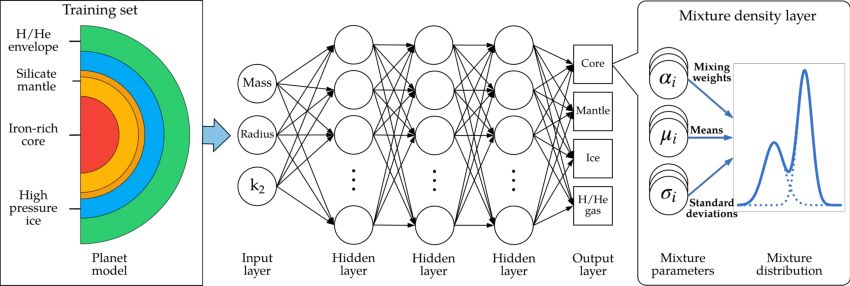

 the process of adopting the learning rate is a function based on [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186)



In [ ]:
!pip uninstall -y torchtext
!pip uninstall torchmetrics
!pip install torchmetrics==0.05

In [ ]:
!  pip install pytorch_tabular

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import random
import numpy as np
import pandas as pd
import os
from pytorch_tabular import TabularModel
from pytorch_tabular.models import (
    CategoryEmbeddingModelConfig,
    NodeConfig,
    TabNetModelConfig,
    CategoryEmbeddingMDNConfig,
    MixtureDensityHeadConfig,
    NODEMDNConfig,
)
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
    ExperimentConfig,
)
from pytorch_tabular.categorical_encoders import CategoricalEmbeddingTransformer

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if not IN_COLAB:
    os.chdir("..")
%load_ext autoreload
%autoreload 2
# prepare the data
train, validation, test = data_preperation(data, continues_f, to_drop, to_scale=True)
epochs = 300
batch_size = 256
steps_per_epoch = int((len(train)//batch_size)*0.9)
data_config = DataConfig(
    target=['target'],
    continuous_cols=train.drop(['target'],axis=1).columns.tolist(),
    categorical_cols=[]
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=batch_size,
    max_epochs=epochs,
    early_stopping_patience = 100,
    gpus=-1
)
experiment_config = ExperimentConfig(
    project_name = 'Bally Regression task',
    exp_watch = "gradients"
)
# optimizer_config = OptimizerConfig(lr_scheduler="OneCycleLR", lr_scheduler_params={"max_lr":0.005, "epochs": epochs, "steps_per_epoch":steps_per_epoch})
optimizer_config = OptimizerConfig(lr_scheduler="ReduceLROnPlateau", lr_scheduler_params={"patience":3})
mdn_config = MixtureDensityHeadConfig(num_gaussian=1)
model_config = CategoryEmbeddingMDNConfig(
    task="regression",
    mdn_config=mdn_config,
    layers="128-64-32",  # Number of nodes in each layer
    activation="ReLU",  # Activation between each layers
    learning_rate=0.001,
    batch_norm_continuous_input=True,
    use_batch_norm=True,
    dropout=0.0,
    embedding_dropout=0,
    initialization="kaiming",
    #         target_range=[(df_train[col].min(),df_train[col].max()) for col in ['target']]
)
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    experiment_config = experiment_config
)

tabular_model.fit(train=train, validation=validation)
result = tabular_model.evaluate(test)
pred_df = tabular_model.predict(test)
pred_df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
                 X1            X2            X3            X4            X5  \
count  24713.000000  24713.000000  24713.000000  24713.000000  24713.000000   
mean       8.593696      4.085016      1.509125      0.458544     35.416987   
std        6.413699      2.778341      1.053525      0.498289     12.138159   
min        1.000000      0.000000      0.000000      0.000000     17.000000   
25%        3.000000      2.000000      0.000000      0.000000     26.000000   
50%        5.000000      3.000000      2.000000      0.000000     33.000000   
75%       14.000000      4.000000      2.000000      1.000000     43.000000   
max       21.000000     12.000000      4.000000      1.000000     90.000000   

                 X6             X7            X8            X9           X10  \
count  24713.000000   24713.000000  24713.000000  24713.000000  24713.000000   
mean      25.502569    1130.766904      

INFO:pytorch_lightning.utilities.seed:Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.core.lightning:
  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 0     
1 | normalizing_batch_norm | BatchNorm1d         | 52    
2 | backbone               | FeedForwardBackbone | 14.2 K
3 | mdn                    | MixtureDensityHead  | 98    
4 | loss                   | MSELoss             | 0     
-----------------------------------------------------

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.distributed:Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.002754228703338169
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.core.lightning:
  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 0     
1 | normalizing_batch_norm | BatchNorm1d         | 52    
2 | backbone               | FeedForwardBackbone | 14.2 K
3 | mdn                    | MixtureDensityHead  | 98    
4 | loss                   | MSELoss             | 0     
---------------------------------------------------------------
14.4 K    Trainable params
0         Non-trainable params
14.4 K    Total params
0.058     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 99it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_mean_squared_error': 0.6047960519790649,
 'test_mean_squared_error_0': 0.6047960519790649}
--------------------------------------------------------------------------------


Generating Predictions...:   0%|          | 0/97 [00:00<?, ?it/s]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X25,X26,X27,target,target_prediction,target_q25,target_q50,target_q75
34081,0.897916,1.682200,-1.438041,-0.917941,-0.380603,2.709954,-0.843397,-0.856030,-0.790276,-0.589388,...,0.073975,-0.357570,-0.704095,0.0,-0.494125,0.818019,-0.764153,-1.092074,-0.696168,-0.315167
52858,1.525088,-0.199138,-1.438041,-0.917941,0.458122,-0.393072,-0.187245,-0.664778,-0.362194,-0.588706,...,-0.230986,0.128098,0.657019,0.0,1.818967,0.584158,0.423737,-0.014993,0.398898,0.917711
29898,0.897916,-0.199138,-1.438041,1.089395,1.064788,-0.393072,1.447316,1.696915,2.039939,1.880024,...,1.154068,1.359632,1.775733,0.0,-0.494125,1.138408,1.016392,0.588946,1.046931,1.406989
2893,-0.326299,0.244459,0.438895,-0.917941,-1.486922,-0.393072,-0.130105,1.324289,0.298373,1.329014,...,-1.053481,0.358669,-0.704095,0.0,-0.494125,0.368822,0.089988,-0.359230,0.074435,0.481060
104349,-0.326299,-0.796760,0.438895,-0.917941,-0.066146,-0.393072,-1.107511,-1.009710,-0.790276,-0.589388,...,0.255347,-0.596734,-0.704095,0.0,-0.494125,-1.178088,-1.052907,-1.524883,-1.007254,-0.684842


MAE: 0.51   CORR: 0.68


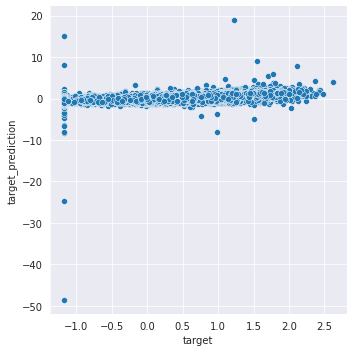

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = pd.DataFrame(pred_df['target_prediction'], columns = ['target_prediction'])
y = pd.DataFrame(test['target'], columns = ['target']).join(y_pred)
sns.relplot(data=y, x="target", y="target_prediction")

mae = format(mean_absolute_error(test['target'], pred_df['target_prediction']), '.2f')
corr = format(np.corrcoef(pred_df['target_prediction'], test['target'])[1, 0], '.2f')
text = print('MAE: ' + str(mae) + '   CORR: ' + str(corr))

34081     0.818019
52858     0.584158
29898     1.138408
2893      0.368822
104349   -1.178088
            ...   
82440     0.864744
102758   -1.178088
30718    -0.356488
57334    -1.110736
4262      0.268560
Name: target, Length: 24713, dtype: float64